# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

df= cities

Cities_df= pd.DataFrame(df).reset_index()
Cities_df.rename(columns={0:'City'}, inplace=True)
Cities_df= Cities_df.loc[:, ["City"]]

len(Cities_df)

615

In [3]:


Cities_df["Cloudiness"] = ""
Cities_df["Country"] = ""     
Cities_df["Date"] = ""        
Cities_df["Humidity"] = ""     
Cities_df["Lat"] = ""          
Cities_df["Lng"] = ""          
Cities_df["Max Temp"] = ""     
Cities_df["Wind Speed"] = "" 
Cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bretzfeld,,,,,,,,
1,punta arenas,,,,,,,,
2,saint george,,,,,,,,
3,port elizabeth,,,,,,,,
4,atuona,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
 # Set parameters
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print("Beginning Data Retrieval")
print("........................")
# use iterrows to iterate through pandas dataframe
count = 0

for index, row in Cities_df.iterrows():

    # get city from df
    city_name = row['City']

     # assemble url and make API request
    
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city_name
      
    response = requests.get(query_url).json()
    
    # extract results
    results = response
    if results["cod"] != 200:
        print("City not found, skipping...")
    else:
        
        Cities_df.loc[index, "Country"] = results["sys"]["country"] 
        Cities_df.loc[index, 'Cloudiness'] = results["clouds"]["all"]
        Cities_df.loc[index, "Date"] = results["dt"]      
        Cities_df.loc[index, "Humidity"] = results["main"]["humidity"]   
        Cities_df.loc[index, "Lat"] = results["coord"]["lat"]        
        Cities_df.loc[index, "Lng"] = results["coord"]["lon"]          
        Cities_df.loc[index, "Max Temp"] = results["main"]["temp_max"]   
        Cities_df.loc[index, "Wind Speed"] = results["wind"]["speed"]              
        
        print("------------------------")
        print("Proceesing: City Record " , count, ' | ' , results["name"], results["sys"]["country"])
        print(query_url)
        count += 1
        #time.sleep(1)  
        
 

Beginning Data Retrieval
........................
------------------------
Proceesing: City Record  0  |  Bretzfeld DE
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=bretzfeld
------------------------
Proceesing: City Record  1  |  Punta Arenas CL
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=punta arenas
------------------------
Proceesing: City Record  2  |  Saint George GR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=saint george
------------------------
Proceesing: City Record  3  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=port elizabeth
------------------------
Proceesing: City Record  4  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=atuona
City not found, skipping

------------------------
Proceesing: City Record  46  |  Marsabit KE
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=marsabit
------------------------
Proceesing: City Record  47  |  Cape Town ZA
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=cape town
------------------------
Proceesing: City Record  48  |  Sungairaya ID
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=sungairaya
------------------------
Proceesing: City Record  49  |  Tomatlan MX
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=tomatlan
------------------------
Proceesing: City Record  50  |  Barrow AR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=barrow
------------------------
Proceesing: City Record  51  |  Necochea AR
http://api.openweatherma

------------------------
Proceesing: City Record  91  |  Calatayud ES
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=calatayud
------------------------
Proceesing: City Record  92  |  San Cristobal EC
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=san cristobal
------------------------
Proceesing: City Record  93  |  Bambous Virieux MU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=bambous virieux
------------------------
Proceesing: City Record  94  |  San Patricio PY
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=san patricio
------------------------
Proceesing: City Record  95  |  Dikson RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=dikson
City not found, skipping...
City not found, skipping...
---------

------------------------
Proceesing: City Record  135  |  Moree AU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=moree
City not found, skipping...
------------------------
Proceesing: City Record  136  |  Ankazoabo MG
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=ankazoabo
------------------------
Proceesing: City Record  137  |  Sawtell AU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=sawtell
------------------------
Proceesing: City Record  138  |  Porto Novo BR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=porto novo
------------------------
Proceesing: City Record  139  |  Barsovo RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=barsovo
------------------------
Proceesing: City Record  140  |  Coihaiqu

------------------------
Proceesing: City Record  181  |  Hokota JP
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=hokota
------------------------
Proceesing: City Record  182  |  Havre-Saint-Pierre CA
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=havre-saint-pierre
------------------------
Proceesing: City Record  183  |  San Juan AR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=san juan
------------------------
Proceesing: City Record  184  |  Antofagasta CL
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=antofagasta
------------------------
Proceesing: City Record  185  |  Daru SL
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=daru
City not found, skipping...
------------------------
Proceesing: City Record

City not found, skipping...
------------------------
Proceesing: City Record  226  |  Nishihara JP
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=nishihara
------------------------
Proceesing: City Record  227  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=coquimbo
------------------------
Proceesing: City Record  228  |  Iqaluit CA
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=iqaluit
City not found, skipping...
------------------------
Proceesing: City Record  229  |  Raton US
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=raton
------------------------
Proceesing: City Record  230  |  Teguldet RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=teguldet
------------------------
Proceesing: Cit

------------------------
Proceesing: City Record  270  |  Cherskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=cherskiy
------------------------
Proceesing: City Record  271  |  Egvekinot RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=egvekinot
------------------------
Proceesing: City Record  272  |  Kaeo NZ
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=kaeo
------------------------
Proceesing: City Record  273  |  Saint Paul US
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=saint paul
------------------------
Proceesing: City Record  274  |  Trat TH
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=trat
------------------------
Proceesing: City Record  275  |  Beringovskiy RU
http://api.openweathermap.

------------------------
Proceesing: City Record  315  |  Banda Aceh ID
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=banda aceh
------------------------
Proceesing: City Record  316  |  Sumbe AO
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=sumbe
------------------------
Proceesing: City Record  317  |  Linfen CN
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=linfen
------------------------
Proceesing: City Record  318  |  Balsas BR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=balsas
------------------------
Proceesing: City Record  319  |  Dapaong TG
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=dapaong
------------------------
Proceesing: City Record  320  |  Kapuskasing CA
http://api.openweathermap.org

------------------------
Proceesing: City Record  360  |  Ulladulla AU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=ulladulla
------------------------
Proceesing: City Record  361  |  Mananjary MG
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=mananjary
------------------------
Proceesing: City Record  362  |  Pandan PH
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=pandan
------------------------
Proceesing: City Record  363  |  Manoel Urbano BR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=manoel urbano
------------------------
Proceesing: City Record  364  |  Tazovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=tazovskiy
City not found, skipping...
------------------------
Proceesing: City Record  

------------------------
Proceesing: City Record  405  |  Soweto ZA
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=soweto
------------------------
Proceesing: City Record  406  |  Fremont US
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=fremont
------------------------
Proceesing: City Record  407  |  Ercis TR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=ercis
------------------------
Proceesing: City Record  408  |  Vila Velha BR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=vila velha
------------------------
Proceesing: City Record  409  |  Aykhal RU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=aykhal
------------------------
Proceesing: City Record  410  |  Belyy Yar RU
http://api.openweathermap.org/d

------------------------
Proceesing: City Record  450  |  Angicos BR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=angicos
------------------------
Proceesing: City Record  451  |  Nizwa OM
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=nizwa
------------------------
Proceesing: City Record  452  |  Atambua ID
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=atambua
------------------------
Proceesing: City Record  453  |  Ostersund SE
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=ostersund
------------------------
Proceesing: City Record  454  |  Inhambane MZ
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=inhambane
------------------------
Proceesing: City Record  455  |  Pangnirtung CA
http://api.openweatherm

------------------------
Proceesing: City Record  496  |  Altay CN
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=altay
------------------------
Proceesing: City Record  497  |  Isangel VU
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=isangel
------------------------
Proceesing: City Record  498  |  Sarab IR
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=sarab
------------------------
Proceesing: City Record  499  |  Henties Bay NA
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=henties bay
------------------------
Proceesing: City Record  500  |  Shenxian CN
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=shenxian
------------------------
Proceesing: City Record  501  |  Nemuro JP
http://api.openweathermap.org/

City not found, skipping...
------------------------
Proceesing: City Record  542  |  Zemio CF
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=zemio
------------------------
Proceesing: City Record  543  |  Santa Barbara US
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=santa barbara
City not found, skipping...
------------------------
Proceesing: City Record  544  |  Bara NG
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=bara
------------------------
Proceesing: City Record  545  |  Joetsu JP
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=joetsu
------------------------
Proceesing: City Record  546  |  Mehamn NO
http://api.openweathermap.org/data/2.5/weather?appid=d61f892de91b7b81ec6bd5d8866ac223&units=imperial&q=mehamn
------------------------
Proceesing: City Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Export file as a CSV, without the Pandas index, but with the header
Cities_df.to_csv("output_data/cities.csv", index=True, header=True)


Cities_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,bretzfeld,0.0,DE,1.553315e+09,77.0,49.18,9.44,45.00,2.24
1,1,punta arenas,20.0,CL,1.553315e+09,87.0,-53.16,-70.91,48.20,9.17
2,2,saint george,40.0,GR,1.553313e+09,93.0,39.45,22.34,41.00,2.62
3,3,port elizabeth,40.0,US,1.553315e+09,60.0,39.31,-74.98,42.01,17.22
4,4,atuona,32.0,PF,1.553315e+09,99.0,-9.80,-139.03,82.58,15.82


In [7]:
#needed to pull the Csv file, dont want to run weather info again
csv_path= "output_data/cities.csv"
Cities_df = pd.read_csv(csv_path, low_memory=False)

Cities_df.head()

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,bretzfeld,0.0,DE,1.553315e+09,77.0,49.18,9.44,45.00,2.24
1,1,punta arenas,20.0,CL,1.553315e+09,87.0,-53.16,-70.91,48.20,9.17
2,2,saint george,40.0,GR,1.553313e+09,93.0,39.45,22.34,41.00,2.62
3,3,port elizabeth,40.0,US,1.553315e+09,60.0,39.31,-74.98,42.01,17.22
4,4,atuona,32.0,PF,1.553315e+09,99.0,-9.80,-139.03,82.58,15.82


In [11]:
#drop any missing values
Cities_df.dropna(how = "all")
Cities_df.count()

Unnamed: 0    615
City          615
Cloudiness    556
Country       553
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

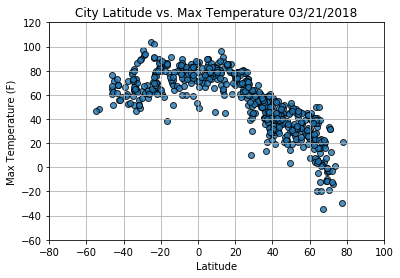

In [13]:
x= Cities_df[["Lat"]].values
y= Cities_df[["Max Temp"]].values
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o",cmap='plasma', alpha=0.8, )

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature {'03/21/2018'}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

plt.savefig("Images/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

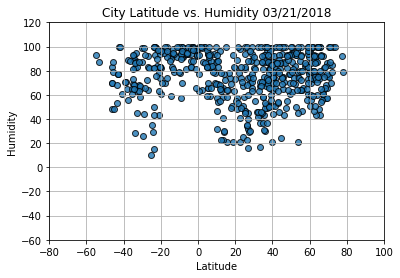

In [16]:
x= Cities_df[["Lat"]].values
y= Cities_df[["Humidity"]].values
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o",cmap='plasma', alpha=0.8, )

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Humidity {'03/21/2018'}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

plt.savefig("Images/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

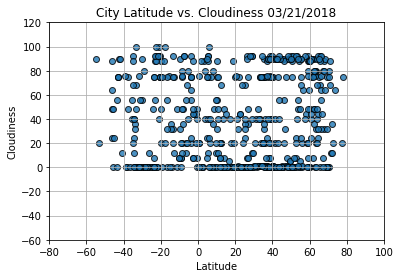

In [17]:
x= Cities_df[["Lat"]].values
y= Cities_df[["Cloudiness"]].values
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o",cmap='plasma', alpha=0.8, )

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness {'03/21/2018'}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

plt.savefig("Images/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

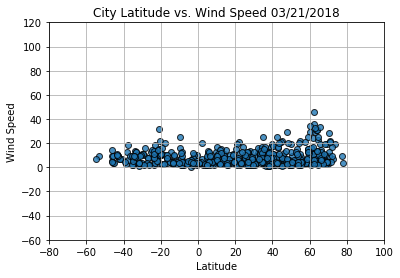

In [18]:
x= Cities_df[["Lat"]].values
y= Cities_df[["Wind Speed"]].values
plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o",cmap='plasma', alpha=0.8, )

# Incorporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed {'03/21/2018'}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

plt.savefig("Images/fig4.png")
plt.show()